In [38]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris()

features = iris.data
target = iris.target

classifier = GaussianNB()

model = classifier.fit(features, target)

new = [[4, 4, 4, 0.4]]

model.predict(new)

array([1])

In [39]:
clf = GaussianNB(priors = [0.25, 0.25, 0.5])

model1 = clf.fit(features, target)

new = [[10, 10, 4, 0.4]]

model1.predict(new)

array([2])

In [40]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

text_data = np.array(['I love Japan Japan', 'Japan is best', 'I love Korean'])

count = CountVectorizer()
print(count)
bag_of_words = count.fit_transform(text_data)
print(bag_of_words)

faetures = bag_of_words.toarray()
target = np.array([0, 0, 1])

classifier = MultinomialNB(class_prior = [0.25, 0.5])

model = classifier.fit(features, target)

new = [[0, 0, 0, 1, 0, 1, 0]]

model.predict(new)

CountVectorizer()
  (0, 4)	1
  (0, 2)	2
  (1, 2)	1
  (1, 1)	1
  (1, 0)	1
  (2, 4)	1
  (2, 3)	1


ValueError: Found input variables with inconsistent numbers of samples: [150, 3]

In [41]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

text_data = np.array(['I love Bazil. Brazil','Brazil is best',
'Germany beats both'])

count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

features = bag_of_words.toarray()
target = np.array([0,0,1])

classifer = MultinomialNB(class_prior=[0.25,0.5])
model = classifer.fit(features, target)

new_observation = [[0,0,0,1,0,1,0]]

model.predict(new_observation)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 7)

In [43]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [44]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [45]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [46]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

Saving figure some_digit_plot


FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\classification\\some_digit_plot.png'

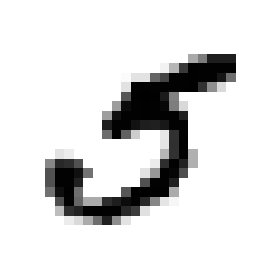

In [47]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()